# Implementation of logistic regression models + permutation analysis + coefficients

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data

1. Generate *dummy* data



In [ ]:
# X, y = make_blobs(n_samples=500, n_features=7, random_state=0, centers=2)

2. **Load our own data**

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [3]:
sessions = [9,12,14,17,21,30,32]
data = []
for session in sessions:
  dat = pd.read_csv('/gdrive/Shareddrives/NoNameGroup - NMA/Results/Topological measures/all_measures_session_' + str(session)+'.csv')
  data.append(dat)

### a. Select just one session

In [ ]:
#df = data[4]

### b. Select all data

In [4]:
df = pd.concat(data)

In [5]:
df.head() 

,Unnamed: 0,reward,session,trial,mean_degree,std_degree,entropy_degree,mean_strenght,std_strenght,entropy_strenght,...,std_degree_midbrain,std_degree_basal_ganglia,mean_strenght_midbrain,mean_strenght_basal_ganglia,std_strenght_midbrain,std_strenght_basal_ganglia,mean_closeness_midbrain,mean_closeness_basal_ganglia,std_closeness_midbrain,std_closeness_basal_ganglia
0,0,-1.0,9,0,26.942339,23.036858,2.033872,0.822096,0.760760,1.885589,...,23.492852,33.904438,0.841226,0.886837,0.757936,1.175359,0.015103,0.014809,0.002123,0.002617
1,1,-1.0,9,1,26.442068,22.174417,1.692113,0.823306,0.753612,1.554402,...,20.934174,40.131987,0.898536,0.936875,0.675810,1.431362,0.016019,0.015746,0.002182,0.002725
2,2,-1.0,9,4,30.085034,25.679664,2.034129,0.957317,0.915441,1.884621,...,22.609441,36.688260,1.033105,0.969399,0.788888,1.270104,0.016256,0.015684,0.002370,0.002949
3,3,-1.0,9,5,65.743590,47.072186,2.093863,3.580402,2.388864,1.985431,...,49.922501,77.217935,3.986008,3.684876,2.354597,4.109050,0.042038,0.040925,0.005045,0.007258
4,4,1.0,9,7,44.633452,36.921637,2.105685,1.546258,1.443353,2.025719,...,37.493441,46.525075,1.721279,1.549950,1.491969,1.738904,0.020644,0.019838,0.003555,0.003275


In [6]:
y = df.loc[:,"reward"]

Escalamos nuestros datos

In [7]:
#X = df.iloc[:,[2,3,4,5,6,]]
X = df.iloc[:,4:]

# Define our statistical model
> Logistic regression ( default *Ridge*: 'l2')



In [8]:
clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression()),
    ]
)

Define cross validation procedure:
> k=5



In [9]:

cv = KFold(n_splits=5) 


# We obtain:

1.   **Performance of our model**
2.   **Performace of permutated data (n=10000 iterations)**
3.   ***p* value** associated to the perfromance of our model


In [10]:
score_data, perm_scores_data, pvalue_data = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=10000
)

# We plot the performance of out model (and its p value) and compare it with permuted data 

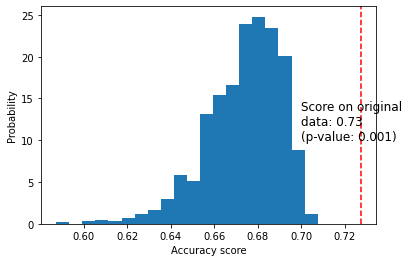

In [11]:
fig, ax = plt.subplots()

ax.hist(perm_scores_data, bins=20, density=True)
ax.axvline(score_data, ls="--", color="r")
score_label = f"Score on original\ndata: {score_data:.2f}\n(p-value: {pvalue_data:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

# Coefficients' interpretation

In [15]:
clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [16]:
clf.named_steps['lr'].coef_

array([[-0.22593691,  0.88159098,  0.63694283, -0.16378417, -0.41303945,
        -0.42871913,  0.52083242, -0.5540042 ,  0.145968  ,  0.24098197,
         0.43060428, -0.31579617, -0.27297223,  0.39543721,  0.31026948,
        -0.86629243, -0.10722153,  0.20943452, -0.70328449, -0.09587838,
         0.8059185 ,  0.05309789,  0.01948306,  0.32136952, -0.67432379,
        -0.20201744,  0.61129915,  0.40725369,  0.54861151, -0.54861089]])

In [17]:
lr_model_coeffs = pd.DataFrame(clf.named_steps['lr'].coef_, columns=X.columns).T.sort_values(0)


In [ ]:
sns.set_style('whitegrid')

lr_model_coeffs.T.plot(kind='bar', title='Model Coefficients', legend=True, figsize = (10,12), colormap= 'rainbow' )
plt.legend(loc='right', bbox_to_anchor=(1.4, .5), fancybox=True, shadow=True)
plt.title('Model Coefficients', fontdict={'fontsize':14});

### Intercept calculation (i.e. $\beta$<sub>0</sub>)

In [18]:
print('Intercept value =', clf.named_steps['lr'].intercept_[0])


Intercept value = -0.9640052514349599


# Predictos significance
 Logit estimator from Statsmodels (~glm model de R)

In [19]:
import statsmodels.api as sm

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

y = y.replace(-1, 0)
y = list(y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
X_scale_df = pd.DataFrame(data=X_scale, columns=X.columns)

In [ ]:
X_scale_df.shape

In [22]:
sm_model = sm.Logit(y, sm.add_constant(X_scale_df)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const                            6.332390e-13
mean_degree                      3.823980e-02
std_degree                       1.871967e-01
entropy_degree                   3.591892e-02
mean_strenght                    2.400526e-02
std_strenght                     3.017207e-01
entropy_strenght                 1.326704e-01
mean_closeness                   1.526215e-01
std_closeness                    9.179498e-01
entropy_closeness                3.436916e-01
mean_clustering                  8.591225e-01
std_clustering                   1.230474e-01
entropy_clustering               1.362391e-01
geodd                            5.582519e-01
smallworld                       7.746137e-01
mean_clustering_midbrain         8.296859e-01
mean_clustering_basal_ganglia    4.887497e-03
std_clustering_midbrain          8.899756e-02
std_clustering_basal_ganglia     4.075429e-01
mean_degree_midbrain             2.341356e-03
mean_degree_basal_ganglia        6.172575e-02
std_degree_midbrain              2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  448
Model:                          Logit   Df Residuals:                      417
Method:                           MLE   Df Model:                           30
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.2839
Time:                        01:30:35   Log-Likelihood:                -196.34
converged:                       True   LL-Null:                       -274.17
Covariance Type:            nonrobust   LLR p-value:                 6.565e-19
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.9812      0.136     -7.193      0.000      -1.249      -0.714
mean_degree                       8.5076      4.105      2.072      0.038       0.461      16.554
std_degree                        4.1305      3.132      1.319      0.187      -2.008      10.269
entropy_degree                    1.1074      0.528      2.098      0.036       0.073       2.142
mean_strenght                   -14.7303      6.526     -2.257      0.024     -27.522      -1.939
std_strenght                     -4.3747      4.236     -1.033      0.302     -12.677       3.928
entropy_strenght                 -0.8811      0.586     -1.504      0.133      -2.030       0.267
mean_closeness                   11.9343      8.344      1.430      0.153      -4.419      28.288
std_closeness                    -0.1763      1.711     -0.103      0.918      -3.530       3.178
entropy_closeness                 0.2113      0.223      0.947      0.344      -0.226       0.649
mean_clustering                   0.5732      3.229      0.177      0.859      -5.756       6.903
std_clustering                    0.8173      0.530      1.542      0.123      -0.221       1.856
entropy_clustering               -0.3286      0.221     -1.490      0.136      -0.761       0.104
geodd                             0.4708      0.804      0.585      0.558      -1.105       2.047
smallworld                        1.2586      4.395      0.286      0.775      -7.356       9.874
mean_clustering_midbrain          0.2127      0.989      0.215      0.830      -1.725       2.150
mean_clustering_basal_ganglia    -1.8787      0.668     -2.814      0.005      -3.187      -0.570
std_clustering_midbrain          -0.6252      0.368     -1.701      0.089      -1.346       0.095
std_clustering_basal_ganglia      0.2346      0.283      0.828      0.408      -0.321       0.790
mean_degree_midbrain            -10.3801      3.411     -3.043      0.002     -17.066      -3.695
mean_degree_basal_ganglia        -5.1903      2.778     -1.868      0.062     -10.635       0.255
std_degree_midbrain               4.9647      2.197      2.259      0.024       0.658       9.272
std_degree_basal_ganglia          0.4816      1.503      0.321      0.749      -2.463       3.427
mean_strenght_midbrain           12.9831      4.600      2.822      0.005       3.967      21.999
mean_strenght_basal_ganglia       7.7724      3.286      2.365      0.018       1.332      14.213
std_strenght_midbrain            -5.3080      2.336     -2.272      0.023      -9.887      -0.729
std_strenght_basal_ganglia       -0.4971      1.722     -0.289      0.773      -3.873       2.879
mean_closeness_midbrain          -4.1026      6.250     -0.656      0.512     -16.353       8.148
mean_closeness_basal_ganglia     -4.7851      4.032     -1.187      0.235     -12.687       3.117
std_closeness_midbrain            1.3614      1.091      1.248      0.212      -0.777       3.499
std_clo

# ***In case we want to balance our data***

In [ ]:
dfreward = df[df['reward'] > 0]
lenreward = len(dfreward['reward'])
dfnoreward = df[df['reward'] <0]
lennoreward = len(dfnoreward['reward'])
minimo = min([lenreward,lennoreward])
df = pd.concat([dfreward[0:minimo],dfnoreward[0:minimo]])
print(lenreward,lennoreward)

135 135
